In [1]:
import pandas as pd

https://www.google.com/search?q=python+read+csv

In [2]:
#데이터 읽기
pd.read_csv('Clinical.csv')

,Relapse,CEA_Post,Lymphatic,Vascular,pStage,pT,pN,Perineural,Age
0,0,0.0,0,0,4,2,2,0,73
1,0,1.2,1,0,4,2,2,1,73
2,1,1.8,1,0,4,1,2,0,53
3,0,0.0,1,0,4,2,2,0,57
4,1,52.0,1,1,6,4,3,0,65
...,...,...,...,...,...,...,...,...,...
387,0,1.7,0,0,4,3,2,0,57
388,0,4.1,0,0,4,4,1,0,63
389,0,2.2,1,0,5,2,3,0,63
390,0,5.2,0,0,4,1,2,0,57


In [83]:
# csv 데이터 읽기
Clinical = pd.read_csv('Clinical.csv')

In [4]:
# 데이터 윗부분 보기
Clinical.head()

,Relapse,CEA_Post,Lymphatic,Vascular,pStage,pT,pN,Perineural,Age
0,0,0.0,0,0,4,2,2,0,73
1,0,1.2,1,0,4,2,2,1,73
2,1,1.8,1,0,4,1,2,0,53
3,0,0.0,1,0,4,2,2,0,57
4,1,52.0,1,1,6,4,3,0,65


In [5]:
# 데이터 정보 보기
Clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Relapse     392 non-null    int64  
 1   CEA_Post    392 non-null    float64
 2   Lymphatic   392 non-null    int64  
 3   Vascular    392 non-null    int64  
 4   pStage      392 non-null    int64  
 5   pT          392 non-null    int64  
 6   pN          392 non-null    object 
 7   Perineural  392 non-null    int64  
 8   Age         392 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 27.7+ KB


<h2>여기서 이상한 것들이 있음.</h2>
1. pN (N-stage) 는 왜 int64로 안읽혀졌을까? <br>
2. Age는 분명 숫자여야할 것 같은데, object라고 되어있음<br>

In [6]:
# Generate descriptive statistics.
# 데이터 통계내기
Clinical.describe() # 평균, 중앙값, 75% 분위수 값 등을 보고 정규분포가 아닌걸 알아야한다.

,Relapse,CEA_Post,Lymphatic,Vascular,pStage,pT,Perineural
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.420918,11.491327,0.681122,0.454082,4.216837,2.640306,0.114796
std,0.494337,52.816959,0.466637,0.498523,1.126941,1.222428,0.319183
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
25%,0.000000,1.400000,0.000000,0.000000,4.000000,2.000000,0.000000
50%,0.000000,2.300000,1.000000,0.000000,4.000000,2.000000,0.000000
75%,1.000000,4.300000,1.000000,1.000000,5.000000,4.000000,0.000000
max,1.000000,723.000000,1.000000,1.000000,6.000000,5.000000,1.000000


평균, 표준편차, Quantile (최소, 25%, 50%, 75%, 최대 출력) 에 출력이 안되는 변수가 Age..<br>
Age는 나와야할 것 같은데?<br>
Categorical 변수가 0 / 1 숫자로 인지되어야 한다면, pN도 출력되어야할 것 같은데...<br>

In [7]:
#Series 데이터에서 Count 변수 출력
Clinical['Relapse'].value_counts()

0    227
1    165
Name: Relapse, dtype: int64

<AxesSubplot:ylabel='Density'>

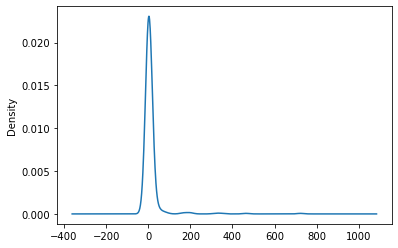

In [8]:
# CEA_Post는 연속형 변수였으므로, density로 보기
Clinical['CEA_Post'].plot.density() # 엉망 그래프로 나온다

<AxesSubplot:ylabel='Density'>

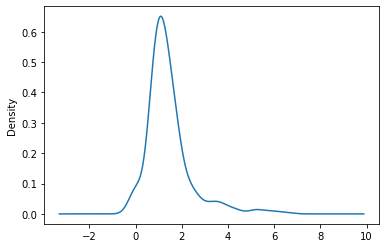

In [74]:
np.log(Clinical['CEA_Post'] + 1).plot.density() # 소수의 큰값들 때문에 로그를 치해줌

<AxesSubplot:>

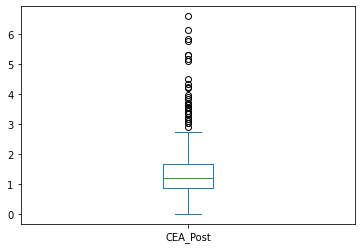

In [75]:
np.log(Clinical['CEA_Post'] + 1).plot.box()

In [9]:
# 혈청암배항원 값
Clinical['CEA_Post'].describe()

count    392.000000
mean      11.491327
std       52.816959
min        0.000000
25%        1.400000
50%        2.300000
75%        4.300000
max      723.000000
Name: CEA_Post, dtype: float64

예제로서 다루는 의료 데이터기 때문에, CEA_Post의 의미를 모르지만..<br>
이 데이터를 실제로 분석하는 사람은 CEA_Post의 뜻을 암.<br>
<br>
따라서 최대 / 최소값이 0, 723이라는 수치를 가지는데 이게 실제로 존재할 수 있는 값인지? 등을 이해해야함<br>

In [10]:
# Lymphatic 데이터
Clinical['Lymphatic']

0      0
1      1
2      1
3      1
4      1
      ..
387    0
388    0
389    1
390    0
391    1
Name: Lymphatic, Length: 392, dtype: int64

In [11]:
# count 데이터 출력
Clinical['Lymphatic'].value_counts()

1    267
0    125
Name: Lymphatic, dtype: int64

In [12]:
# Vascular invasion 역시 count data.
Clinical['Vascular']

0      0
1      0
2      0
3      0
4      1
      ..
387    0
388    0
389    0
390    0
391    0
Name: Vascular, Length: 392, dtype: int64

In [13]:
# count data 형태로 출력
Clinical['Vascular'].value_counts()

0    214
1    178
Name: Vascular, dtype: int64

In [14]:
# stage 출력.. 이 역시 categorical 데이터로 보임
Clinical['pStage']

0      4
1      4
2      4
3      4
4      6
      ..
387    4
388    4
389    5
390    4
391    4
Name: pStage, Length: 392, dtype: int64

In [15]:
# pStage 역시 categorical data이므로, count 출력
Clinical['pStage'].value_counts()

4    150
5    137
2     55
6     36
3     14
Name: pStage, dtype: int64

In [16]:
# pT 또한 count data로 보임
Clinical['pT']

0      2
1      2
2      1
3      2
4      4
      ..
387    3
388    4
389    2
390    1
391    1
Name: pT, Length: 392, dtype: int64

In [17]:
# count data로 출력
Clinical['pT'].value_counts()

2    160
4     91
1     66
3     45
5     30
Name: pT, dtype: int64

In [18]:
# pN 데이터: categorical 처럼 생김
Clinical['pN']

0      2
1      2
2      2
3      2
4      3
      ..
387    2
388    1
389    3
390    2
391    2
Name: pN, Length: 392, dtype: object

# pN에 문제가 있는것으로 보임

In [19]:
Clinical['pN'].value_counts()

2    143
3    123
1    119
b      3
a      2
c      2
Name: pN, dtype: int64

In [20]:
Clinical['pN'][Clinical['pN'] == 'b']

366    b
367    b
370    b
Name: pN, dtype: object

In [21]:
Clinical['pN'][Clinical['pN'] == 'b'] = 2, 2, 2

C:\Users\user\AppData\Local\Temp/ipykernel_14004/502172234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clinical['pN'][Clinical['pN'] == 'b'] = 2, 2, 2


In [22]:
Clinical['pN'].value_counts()

2    143
3    123
1    119
2      3
a      2
c      2
Name: pN, dtype: int64

# 왜 2가 2개인지??

In [23]:
# 알고보니 '2', string 형태로 저장되었음.
# 이유: 1, 2, 3 숫자 사이에 a, b가 있기 때문에..

# data.frame은 기본적으로 데이터를 읽을 때 vector로서 접근함
# python의 pandas에만 예외적으로 서로 다른 형태의 변수가 담기는 list가 기본형태의 변수이기 때문에
# 한 column에 다양한 형태의 변수가 담길 수 있긴 한건데, 이것은 매우 잘못된 형태임

# 근본적으로 python은 general programing language라는것 ㅠㅠ.

# data.frame의 column은 개념적으로 모두 동일한 형태의 변수여야함
# 그래야 통계, 분석, 시각화 등을 진행할 수 있음

Clinical['pN'][1]

'2'

In [24]:
# 숫자 2를 일단 string '2'로 바꿔줌
Clinical['pN'][Clinical['pN'] == 2] = '2', '2', '2'

C:\Users\user\AppData\Local\Temp/ipykernel_14004/3592670066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clinical['pN'][Clinical['pN'] == 2] = '2', '2', '2'


In [25]:
Clinical['pN'].value_counts()

2    146
3    123
1    119
a      2
c      2
Name: pN, dtype: int64

In [26]:
# 'a'도 2개니까 넣어주기
Clinical['pN'][Clinical['pN'] == 'a'] = '1', '1'

C:\Users\user\AppData\Local\Temp/ipykernel_14004/3248424543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clinical['pN'][Clinical['pN'] == 'a'] = '1', '1'


In [27]:
# 'c'도 2개니까 넣어주기
Clinical['pN'][Clinical['pN'] == 'c'] = '3', '3'

C:\Users\user\AppData\Local\Temp/ipykernel_14004/1349707999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clinical['pN'][Clinical['pN'] == 'c'] = '3', '3'


In [28]:
# pN은 정상
Clinical['pN'].value_counts()

2    146
3    125
1    121
Name: pN, dtype: int64

In [29]:
# Perineural 역시 categorical 변수
Clinical['Perineural']

0      0
1      1
2      0
3      0
4      0
      ..
387    0
388    0
389    0
390    0
391    0
Name: Perineural, Length: 392, dtype: int64

In [30]:
# Perineural 역시 정상
Clinical['Perineural'].value_counts()

0    347
1     45
Name: Perineural, dtype: int64

In [85]:
# Age, 왜 type이 object????
Clinical['Age']

0      73
1      73
2      53
3      57
4      65
       ..
387    57
388    63
389    63
390    57
391    52
Name: Age, Length: 392, dtype: object

In [87]:
Clinical['Age'] = Clinical['Age'].astype("int64") # 숫자가 아닌 str이 들어가있으면 안된다.

ValueError: invalid literal for int() with base 10: '65a'

In [86]:
Clinical['Age'].unique()

array(['73', '53', '57', '65', '77', '50', '70', '78', '66', '71', '63',
       '64', '62', '48', '60', '75', '72', '68', '59', '76', '46', '49',
       '54', '58', '67', '51', '43', '56', '40', '33', '55', '69', '61',
       '44', '65a', '24', '74', '52', '79', '38', '80', '45', '83', '61s',
       '41', '47', '26', '42', '37', '35'], dtype=object)

https://www.google.com/search?q=pandas+series+find+not+numeric+value


https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isnumeric.html

In [90]:
Clinical['Age'].str.isnumeric

<bound method _map_and_wrap.<locals>.wrapper of <pandas.core.strings.accessor.StringMethods object at 0x00000271A1CF8670>>

In [33]:
Clinical['Age'].str.isnumeric()

0      True
1      True
2      True
3      True
4      True
       ... 
387    True
388    True
389    True
390    True
391    True
Name: Age, Length: 392, dtype: bool

In [34]:
# Describe 함수의 결과가 mean, sd, quantile 등이 나와야하는데 이상한게 튀어나옴
Clinical['Age'].describe()

count     392
unique     50
top        70
freq       20
Name: Age, dtype: object

In [35]:
# Numeric 인지 아닌지 boolean vector로 결과를 출력해주는 함수
Clinical['Age'].str.isnumeric()

0      True
1      True
2      True
3      True
4      True
       ... 
387    True
388    True
389    True
390    True
391    True
Name: Age, Length: 392, dtype: bool

In [36]:
# 이 데이터 역시 Series
type(Clinical['Age'].str.isnumeric())

pandas.core.series.Series

In [37]:
# 따라서 value_counts 가능
Clinical['Age'].str.isnumeric().value_counts()

True     390
False      2
Name: Age, dtype: int64

In [38]:
# ~를 활용하여 boolean을 뒤집을 수 있음, 뉴메릭이 아닌것만 True로 변경
~Clinical['Age'].str.isnumeric()

0      False
1      False
2      False
3      False
4      False
       ...  
387    False
388    False
389    False
390    False
391    False
Name: Age, Length: 392, dtype: bool

In [39]:
# True에 해당하는 index만 뽑혀짐
Clinical['Age'][
    ~Clinical['Age'].str.isnumeric()
]

133    65a
268    61s
Name: Age, dtype: object

In [40]:
# 해당 위치에 정보 넣기
Clinical['Age'][[133, 268]] = 65, 61

C:\Users\user\AppData\Local\Temp/ipykernel_14004/1016414052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clinical['Age'][[133, 268]] = 65, 61


In [41]:
Clinical['Age'][[1, 133, 268]]

1      73
133    65
268    61
Name: Age, dtype: object

In [42]:
# 역시 object로 출력되기에, 숫자 형태로 바꿔줘야함
Clinical['Age'].describe()

count     392
unique     50
top        70
freq       20
Name: Age, dtype: object

In [43]:
Clinical['Age'].astype('float')

0      73.0
1      73.0
2      53.0
3      57.0
4      65.0
       ... 
387    57.0
388    63.0
389    63.0
390    57.0
391    52.0
Name: Age, Length: 392, dtype: float64

In [44]:
Clinical['Age'] = Clinical['Age'].astype('float')

In [45]:
Clinical['CEA_Post']

0       0.0
1       1.2
2       1.8
3       0.0
4      52.0
       ... 
387     1.7
388     4.1
389     2.2
390     5.2
391     2.8
Name: CEA_Post, Length: 392, dtype: float64

# 진짜 변수 형태로 모두다 바꿔주기

In [46]:
Clinical['Relapse'] = Clinical['Relapse'].astype('category')
#Clinical['CEA_Post'] = Clinical['CEA_Post'].astype('float')
Clinical['CEA_Post'] = Clinical['CEA_Post'].astype(float)
Clinical['Lymphatic'] = Clinical['Lymphatic'].astype('category')
Clinical['Vascular'] = Clinical['Vascular'].astype('category')
Clinical['pStage'] = Clinical['pStage'].astype('category')
Clinical['pT'] = Clinical['pT'].astype('category')
Clinical['pN'] = Clinical['pN'].astype('category')
Clinical['Perineural'] = Clinical['Perineural'].astype('category')
Clinical['Age'] = Clinical['Age'].astype('float')

In [47]:
Clinical.describe()

,CEA_Post,Age
count,392.000000,392.000000
mean,11.491327,63.028061
std,52.816959,9.733362
min,0.000000,24.000000
25%,1.400000,57.000000
50%,2.300000,65.000000
75%,4.300000,70.000000
max,723.000000,83.000000


In [48]:
Clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Relapse     392 non-null    category
 1   CEA_Post    392 non-null    float64 
 2   Lymphatic   392 non-null    category
 3   Vascular    392 non-null    category
 4   pStage      392 non-null    category
 5   pT          392 non-null    category
 6   pN          392 non-null    category
 7   Perineural  392 non-null    category
 8   Age         392 non-null    float64 
dtypes: category(7), float64(2)
memory usage: 10.0 KB


In [49]:
!pip3 install tableone

In [50]:
import tableone

In [51]:
mytable = tableone.TableOne(Clinical,
                   columns=list(Clinical.columns),
                   categorical=['Lymphatic', 'Vascular', 'pStage', 'pT', 'pN', 'Perineural'],
                   groupby='Relapse')

C:\Users\user\anaconda3\lib\site-packages\tableone\tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] = df['freq'].div(df.freq.sum(level=0),


In [52]:
mytable

Grouped by Relapse                                      
                                 Missing      Overall           0            1
n                                                 392         227          165
CEA_Post, mean (SD)                    0  11.5 (52.8)  4.1 (11.9)  21.6 (79.2)
Lymphatic, n (%)    0                  0   125 (31.9)   91 (40.1)    34 (20.6)
                    1                      267 (68.1)  136 (59.9)   131 (79.4)
Vascular, n (%)     0                  0   214 (54.6)  144 (63.4)    70 (42.4)
                    1                      178 (45.4)   83 (36.6)    95 (57.6)
pStage, n (%)       2                  0    55 (14.0)   38 (16.7)    17 (10.3)
                    3                        14 (3.6)    11 (4.8)      3 (1.8)
                    4                      150 (38.3)   94 (41.4)    56 (33.9)
                    5                      137 (34.9)   71 (31.3)    66 (40.0)
                    6                        36 (9.2)    13 (5.7)    23 (13.9)
pT, n (%)           1                  0    66 (16.8)   48 (21.1)    18 (10.9)
                    2                      160 (40.8)   84 (37.0)    76 (46.1)
                    3                       45 (11.5)   25 (11.0)    20 (12.1)
                    4                       91 (23.2)   55 (24.2)    36 (21.8)
                    5                        30 (7.7)    15 (6.6)     15 (9.1)
pN, n (%)           1                  0   121 (30.9)   83 (36.6)    38 (23.0)
                    2                      146 (37.2)   90 (39.6)    56 (33.9)
                    3                      125 (31.9)   54 (23.8)    71 (43.0)
Perineural, n (%)   0                  0   347 (88.5)  209 (92.1)   138 (83.6)
                    1                       45 (11.5)    18 (7.9)    27 (16.4)
Age, mean (SD)                         0   63.0 (9.7)  63.0 (9.6)  63.0 (10.0)

In [53]:
mytable = tableone.TableOne(Clinical,
                   columns=list(Clinical.columns),
                   categorical=['Lymphatic', 'Vascular', 'pStage', 'pT', 'pN', 'Perineural'],
                   groupby='Relapse',
                   pval=True)

C:\Users\user\anaconda3\lib\site-packages\tableone\tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] = df['freq'].div(df.freq.sum(level=0),


In [54]:
mytable

Grouped by Relapse                                              
                                 Missing      Overall           0            1 P-Value
n                                                 392         227          165        
CEA_Post, mean (SD)                    0  11.5 (52.8)  4.1 (11.9)  21.6 (79.2)   0.006
Lymphatic, n (%)    0                  0   125 (31.9)   91 (40.1)    34 (20.6)  <0.001
                    1                      267 (68.1)  136 (59.9)   131 (79.4)        
Vascular, n (%)     0                  0   214 (54.6)  144 (63.4)    70 (42.4)  <0.001
                    1                      178 (45.4)   83 (36.6)    95 (57.6)        
pStage, n (%)       2                  0    55 (14.0)   38 (16.7)    17 (10.3)   0.003
                    3                        14 (3.6)    11 (4.8)      3 (1.8)        
                    4                      150 (38.3)   94 (41.4)    56 (33.9)        
                    5                      137 (34.9)   71 (31.3)    66 (40.0)        
                    6                        36 (9.2)    13 (5.7)    23 (13.9)        
pT, n (%)           1                  0    66 (16.8)   48 (21.1)    18 (10.9)   0.062
                    2                      160 (40.8)   84 (37.0)    76 (46.1)        
                    3                       45 (11.5)   25 (11.0)    20 (12.1)        
                    4                       91 (23.2)   55 (24.2)    36 (21.8)        
                    5                        30 (7.7)    15 (6.6)     15 (9.1)        
pN, n (%)           1                  0   121 (30.9)   83 (36.6)    38 (23.0)  <0.001
                    2                      146 (37.2)   90 (39.6)    56 (33.9)        
                    3                      125 (31.9)   54 (23.8)    71 (43.0)        
Perineural, n (%)   0                  0   347 (88.5)  209 (92.1)   138 (83.6)   0.015
                    1                       45 (11.5)    18 (7.9)    27 (16.4)        
Age, mean (SD)                         0   63.0 (9.7)  63.0 (9.6)  63.0 (10.0)   0.978

In [55]:
help(tableone.TableOne)

Help on class TableOne in module tableone.tableone:

class TableOne(builtins.object)
 |  TableOne(data: pandas.core.frame.DataFrame, columns: Optional[list] = None, categorical: Optional[list] = None, groupby: Optional[str] = None, nonnormal: Optional[list] = None, min_max: Optional[list] = None, pval: Optional[bool] = False, pval_adjust: Optional[str] = None, htest_name: bool = False, pval_test_name: bool = False, htest: Optional[dict] = None, isnull: Optional[bool] = None, missing: bool = True, ddof: int = 1, labels: Optional[dict] = None, rename: Optional[dict] = None, sort: Union[bool, str] = False, limit: Union[int, dict, NoneType] = None, order: Optional[dict] = None, remarks: bool = False, label_suffix: bool = True, decimals: Union[int, dict] = 1, smd: bool = False, overall: bool = True, row_percent: bool = False, display_all: bool = False, dip_test: bool = False, normal_test: bool = False, tukey_test: bool = False) -> None
 |  
 |  If you use the tableone package, please cite:


# 시각화

In [56]:
import seaborn

In [91]:
dir(seaborn)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_core',
 '_decorators',
 '_docstrings',
 '_orig_rc_params',
 '_statistics',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'factorplot',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'matrix',

In [57]:
help(seaborn.barplot)

Help on function barplot in module seaborn.categorical:

barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x000002719C6F60D0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    va

<AxesSubplot:xlabel='Relapse', ylabel='Age'>

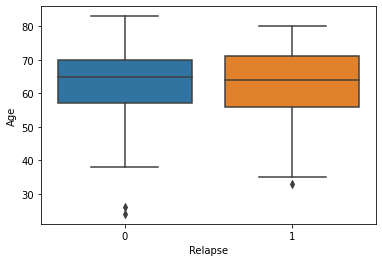

In [58]:
# Age에 대하여 boxplot 그리기
seaborn.boxplot(x="Relapse", y="Age", data=Clinical)

<AxesSubplot:xlabel='Relapse', ylabel='CEA_Post'>

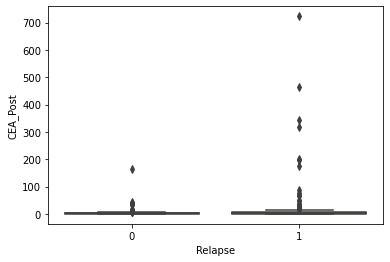

In [59]:
# boxplot
seaborn.boxplot(x="Relapse", y="CEA_Post", data=Clinical)

<AxesSubplot:ylabel='Density'>

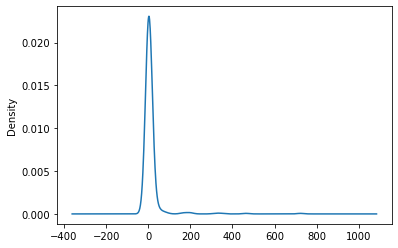

In [60]:
Clinical["CEA_Post"].plot.density()

<AxesSubplot:ylabel='Density'>

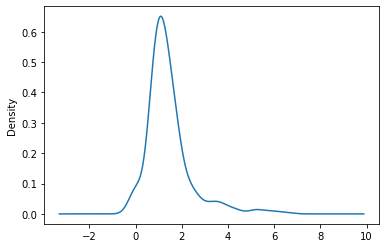

In [61]:
# CEA_Post는 exponential scale
import numpy as np
np.log(Clinical["CEA_Post"] + 1).plot.density()


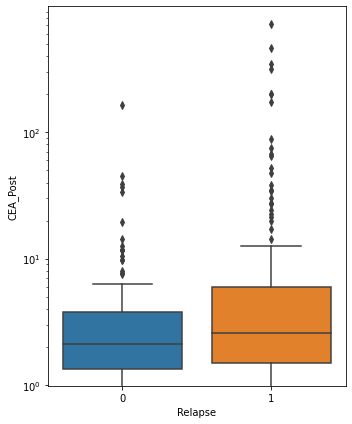

In [62]:
# matplot library 사용
# 실제 CEA_Post 값을 log(x + 1)로 변형해도 됨.

# 이 예제에서는 matplot lib에서 y축을 강제로 log scale로 바꾸는 방법
import matplotlib.pyplot as plt

# subplot 객체 만들기
fig, ax= plt.subplots(figsize=(5, 6))

# y축 log scale로 바꾸기
ax.set_yscale('log')

# boxplot 그리기
seaborn.boxplot(x="Relapse", y="CEA_Post", data=Clinical)

# 최종 그림 띄우기
plt.tight_layout()

## Relapse에 따른 CEA_Post의 비교. (통계)

https://wjddyd66.github.io/dataanalysis/T/

In [63]:
!pip3 install stats
!pip3 install scipy

  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24297 sha256=c537eb1b8709b25ce822dccff9780a8b55a29da37126cfc340f4b77e683de7c5
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\15\a4\f5\a7431ca9ac466505e866f76a55ae9f94192eafb0f634fce49f
Successfully built stats


In [64]:
import stats
import scipy

# 둘 간의 차이를 확인하기 위해서, T. test를 사용?
# 분포에 의해 Wilcox test, Mann-whitney u test를 써야함

In [65]:
scipy.stats.mannwhitneyu

<function scipy.stats._mannwhitneyu.mannwhitneyu(x, y, use_continuity=True, alternative='two-sided', axis=0, method='auto')>

In [66]:
help(scipy.stats.mannwhitneyu)

Help on function mannwhitneyu in module scipy.stats._mannwhitneyu:

mannwhitneyu(x, y, use_continuity=True, alternative='two-sided', axis=0, method='auto')
    Perform the Mann-Whitney U rank test on two independent samples.
    
    The Mann-Whitney U test is a nonparametric test of the null hypothesis
    that the distribution underlying sample `x` is the same as the
    distribution underlying sample `y`. It is often used as a test of
    of difference in location between distributions.
    
    Parameters
    ----------
    x, y : array-like
        N-d arrays of samples. The arrays must be broadcastable except along
        the dimension given by `axis`.
    use_continuity : bool, optional
            Whether a continuity correction (1/2) should be applied.
            Default is True when `method` is ``'asymptotic'``; has no effect
            otherwise.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis. Default is 'two-sided'

In [67]:
Clinical['CEA_Post']

0       0.0
1       1.2
2       1.8
3       0.0
4      52.0
       ... 
387     1.7
388     4.1
389     2.2
390     5.2
391     2.8
Name: CEA_Post, Length: 392, dtype: float64

In [68]:
Clinical['CEA_Post'][Clinical['Relapse'] == 0]
Clinical['CEA_Post'][Clinical['Relapse'] == 1]

2        1.8
4       52.0
5        1.9
8        2.9
10     319.0
       ...  
376      2.0
377      1.9
385     11.6
386    200.0
391      2.8
Name: CEA_Post, Length: 165, dtype: float64

In [69]:
mannRes = scipy.stats.mannwhitneyu(
    x = Clinical['CEA_Post'][Clinical['Relapse'] == 0],
    y = Clinical['CEA_Post'][Clinical['Relapse'] == 1]
)

In [70]:
mannRes.pvalue

0.0028206893498358924

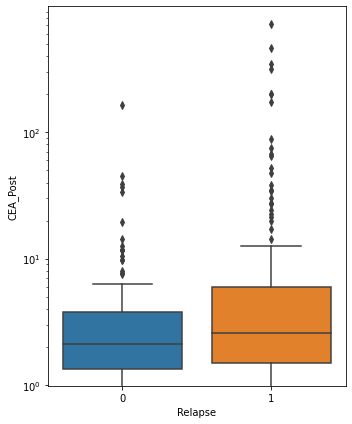

In [71]:
# matplot library 사용
# 실제 CEA_Post 값을 log(x + 1)로 변형해도 됨.

# 이 예제에서는 matplot lib에서 y축을 강제로 log scale로 바꾸는 방법
import matplotlib.pyplot as plt

# subplot 객체 만들기
fig, ax= plt.subplots(figsize=(5, 6))

# y축 log scale로 바꾸기
ax.set_yscale('log')

# boxplot 그리기
seaborn.boxplot(x="Relapse", y="CEA_Post", data=Clinical)

# 최종 그림 띄우기
plt.tight_layout()

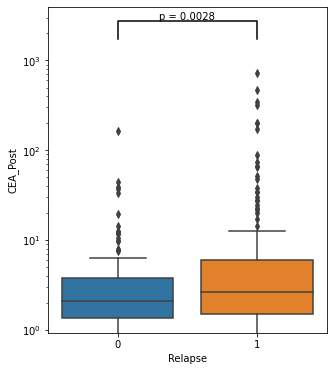

In [72]:
# Log scale 도화지 그리기
fig, ax= plt.subplots(figsize=(5, 6))
ax.set_yscale('log')

# boxplot 그리기
seaborn.boxplot(x="Relapse", y="CEA_Post", data=Clinical)


# 높이 설정
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = Clinical['CEA_Post'].max() + 1000, 1000, 'k'# y축이 log scale이기 때문에 1000으로 높게 작성

# 통계 점수 표시
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "p = 0.0028", ha='center', va='bottom', color=col)

# 최종 그림 띄우기
plt.show()

# 실습 과제

1. 연속형 변수에 대하여
Density plot 검색해서 그려보기 (CEA_Post, Age)

2. 범주형 변수에 대하여 (Vascular, pStage)
Count를 기반으로 bar-plot 그려보기

Vascular의 Count에 대하여 Fisher exact test를 이용하여 통계 p-value를 구하고,
그림에 통계 수치 추가해보기